In [191]:
import pandas as pd

import pandapower as pp
import pandapower.networks as pn
import pandapower.plotting as plot
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
matplotlib.rcParams['timezone'] = 'Europe/Berlin'

import data_process_base
import importlib
importlib.reload(data_process_base)

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [192]:
# create random time series from import data
da = data_process_base.DataAction()
keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'cet_cest_timestamp']
da.imp_procc("house_data.csv", keep_cols)
night_merge = da.power_merge()

Number of data frame segments =  90
dfList created successfully.


In [193]:
# # for testing the sgen_comm function
# test = night_merge.iloc[:9,:].copy()
# da.sgen_comm(ts=test, wind_length=2, sgen_val=999999, parties=4)

In [194]:
# assign generator value at random times
sgen_val = 0.01 # typical val: 0.010 MW = 10kW
# night_mw = da.sgen_comm(ts=night_merge, wind_length=60, sgen_val=sgen_val, parties=4)
night_mw = da.sgen_rand(ts=night_merge, sgen_val=sgen_val)


100%|██████████| 601/601 [00:01<00:00, 356.26it/s]


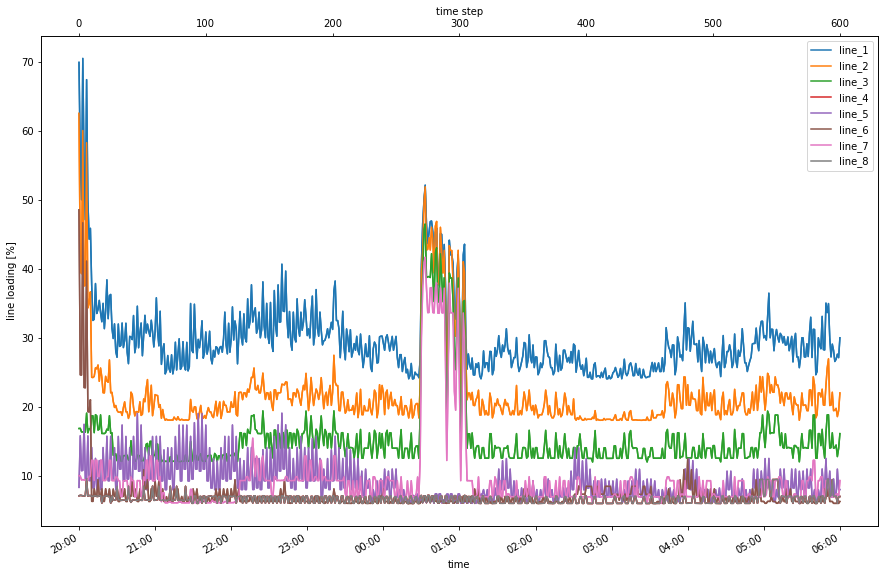

In [195]:
# run timeseries processes
nc = data_process_base.net_calc()

nc.four_loads_branched_make(night_mw)
nc.four_loads_branched_out("res_line", "loading_percent")
nc.four_loads_branched_run()
nc.four_loads_branched_read_loadpct()
nc.four_loads_branched_plot_linepct()

100%|██████████| 2/2 [00:00<00:00, 28.87it/s]


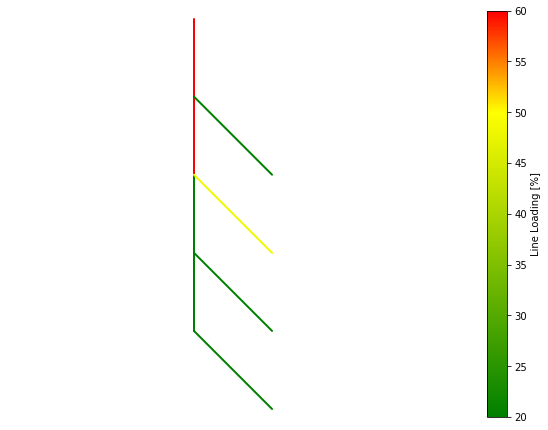

In [199]:
nc.load_graph(nc.net, 0)